# 4.3.4 Balanced Accuracy Score

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score

import warnings
warnings.filterwarnings("ignore")

Esta métrica permite corregir cómputos erroneos sobre la precisión de un clasificador cuando las clases están imbalanceadas.
Cuando la muestra está balanceada equivale a la métrica accuracy. <br>
Esta medida es facilmente interpretada a partir de la matriz de confusión en el caso binario y es igual a:

    - La media aritmética de la sensibilidad (True Positive Rate) y la especificidad (True Negative Rate).
    - El area bajo la curva ROC con predicciones binarias en vez de scores.

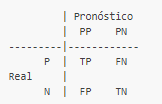

$$ balanced_accuracy = \frac{1}{2} (\frac{TP}{P} + \frac{TN}{N}) =  \frac{1}{2} (\frac{TP}{TP + FN} + \frac{TN}{TN + FP}) = \frac{1}{2} (TPR + TNR) $$




In [4]:
y_true = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

accuracy_score(
    y_true,
    y_pred,
)

0.8

- La versión implementada equivale a accuracy_score con pesos balanceados por clase.
- Si la precisión convencional está por encima del azar solo porque el clasificador aprovecha un conjunto de prueba desequilibrado, entonces la precisión equilibrada, según corresponda, se reducirá a:

$$ \frac{1}{N_{clases}} $$

In [6]:
y_true = [1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

balanced_accuracy_score(
    y_true=y_true,
    y_pred=y_pred,
)

0.3333333333333333

Los scores van de 0 a 1 para adjusted=False.

In [7]:
y_true = [1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

balanced_accuracy_score(
    y_true=y_true,
    y_pred=y_pred,
)

0.0

Los scores se reescalan al rango

$$ \frac{1}{1 - N_{clases}} $$

y 1.0, con desempeño 0 para el scoring aleatorio

In [8]:
y_true = [1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

balanced_accuracy_score(
    y_true=y_true,
    y_pred=y_pred,
    adjusted=False,
)

0.3333333333333333

In [9]:
balanced_accuracy_score(
    y_true=y_true,
    y_pred=y_pred,
    adjusted=True,
)

0.0

In [10]:
y_true = [1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

balanced_accuracy_score(
    y_true=y_true,
    y_pred=y_pred,
    adjusted=True,
)

-0.49999999999999994

Si $y_i$ es el valor verdadero de la $i-ésima$ muestra, y $w_i$ es su peso, entonces el peso de la $i-ésima$ muestra se ajusta como:

$$ \hat{w_i} = \frac{w_i}{\sum_{j}{} 1(\hat{y_j}=y_i)w_j} $$

Si $y^i$ es el valor pronósticado para la $i-ésima$ muestra, entonces la función de scoring es definida como:

$$ balanced_accuracy =  \frac{1}{\sum_{}{} w_i}  1(\hat{y_j}=y_i) \hat{w_j} $$

In [5]:
print('ok_')

ok_
